At first let's import all the necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now let's add the dataset

In [5]:
df = pd.read_csv('cars.csv')

In [7]:
print(df.head())

                  Model  Year  Horsepower  TopSpeed  Weight  \
0          Audi A4 2032  2032         104       183    4395   
1       Ferrari F8 2024  2024        1419       201    3335   
2       Ferrari F8 2021  2021         385       203    4748   
3  Volkswagen Golf 2000  2000        1170        93    2906   
4      Porsche 911 2001  2001        1423       130    4750   

   FuelEfficiency_MPG  Price_USD           EngineType  ZeroToSixty_sec  \
0               14.47     118970  Dark Matter Reactor             6.12   
1               21.48     108365  Dark Matter Reactor             6.87   
2               17.62      34600             Electric             9.18   
3               21.67     132334  Dark Matter Reactor            11.13   
4               11.21     145307  Dark Matter Reactor            11.15   

     FuelType  
0    Electric  
1     Nuclear  
2    Electric  
3  Unobtanium  
4      Diesel  


In [8]:
print(df.tail())

                  Model  Year  Horsepower  TopSpeed  Weight  \
859     Tax Return 1975  1975        4000       676    5459   
860       Overtime 2039  2039        1162       218    1689   
861      Tiny Roar 2023  2023        2291       718   12049   
862  Noise Machine 1997  1997        2767       307    9435   
863  Noise Machine 1984  1984         608       396    4133   

     FuelEfficiency_MPG  Price_USD   EngineType  ZeroToSixty_sec    FuelType  
859              104.19    3972937     Electric             5.30    Gasoline  
860               51.38    3208233     Electric             2.83    Electric  
861               83.96     562603       Hybrid             3.26   Moon Dust  
862               56.02     395207  Fusion Core             3.74  Unobtanium  
863               83.04    4104514           V8             4.37    Electric  


Now I'm going to list all the cars that I'd like to buy from this list

In [25]:
dangerous_cars = df[(df['EngineType'] == 'Dark Matter Reactor') & (df['FuelType'] == 'Nuclear')][['Model', 'Year', 'Horsepower', 'Price_USD']]

In [29]:
print(dangerous_cars)

                     Model  Year  Horsepower  Price_USD
1          Ferrari F8 2024  2024        1419     108365
12      Tesla Model S 2027  2027        1168     197784
128     Mercedes C300 2007  2007          85      60539
211           Mazda 3 1993  1993        1286      88783
253          Kia Soul 2045  2045         353     168498
254   Hyundai Elantra 1986  1986         119      92227
351           Audi A4 2019  2019        1465     122087
370  Chevrolet Impala 2038  2038         771     186420
439          Lunar LX 1983  1983        2674    3394703
534      Nova Cruiser 1992  1992        2618     677340
664          Comet GT 2008  2008        2560    1875650
683         Tiny Roar 2021  2021        2318    2987303
684     Budget Rocket 2013  2013        1925    1782130
736       Rust Bucket 2030  2030        3928    2915388


Now let's calculate the average horsepower of all the cars made in the year 2001

In [32]:
cars_2001 = df[df['Year'] == 2001]
hp_2001 = cars_2001['Horsepower'].to_numpy()

In [33]:
average_hp_2001 = np.mean(hp_2001)

In [35]:
print(f"2001 cars average hp is {average_hp_2001}")

2001 cars average hp is 1048.111111111111


Now I'll find the cheapest car with a horsepower more than 500

In [36]:
high_hp_cars = df[df['Horsepower'] > 500]

In [37]:
cheapest_high_hp = high_hp_cars.sort_values(by='Price_USD').head(10)

In [38]:
cheapest_high_hp[['Model', 'Horsepower', 'Price_USD']]

,Model,Horsepower,Price_USD
223,Tesla Model S 2003,1072,16155
230,Subaru Outback 1985,1145,17011
392,Subaru Outback 1995,1181,17211
269,Toyota Camry 1994,1044,17352
14,Chevrolet Corvette 1979,1424,17441
28,Chevrolet Impala 2018,1354,17685
403,Ferrari F8 2033,797,18074
276,Kia Soul 2016,1329,19236
87,Kia Soul 1978,1371,20053
286,Lexus IS300 2050,1000,20501


Now let's make some visualisations with matplotlib

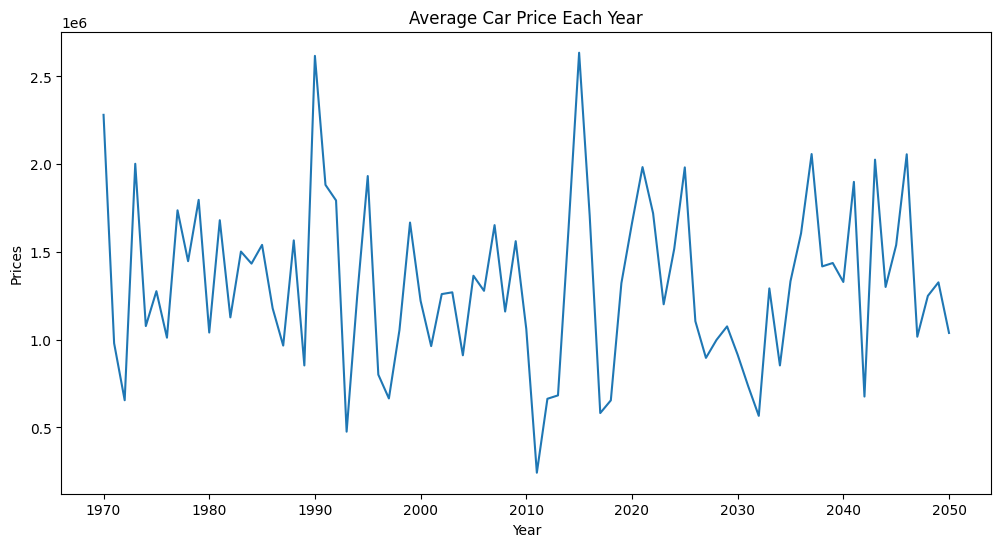

In [44]:
avg_price_by_year = df.groupby('Year')['Price_USD'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_year['Year'], avg_price_by_year['Price_USD'])
plt.xlabel("Year")
plt.ylabel("Prices")
plt.title("Average Car Price Each Year")
plt.show()

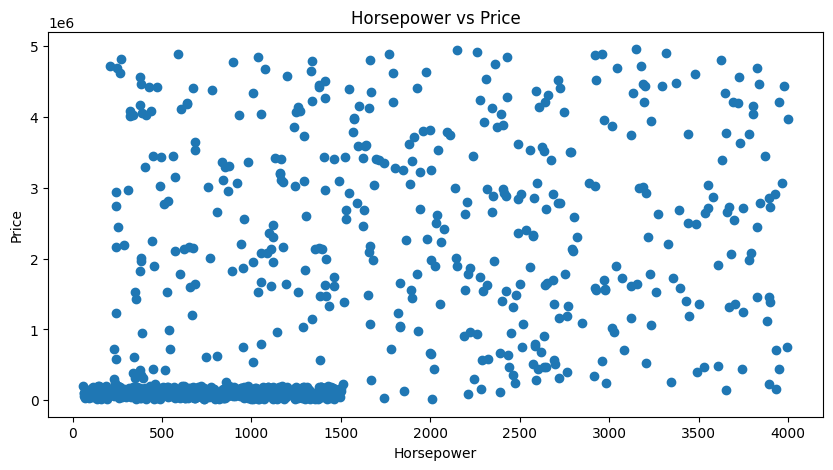

In [45]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Horsepower'], df['Price_USD'])
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower vs Price")
plt.show()